In [1]:
import numpy as np
import pandas as pd
import pyhere
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dir_data_raw = pyhere.here().resolve().joinpath("data", "raw")
dir_data_interim = pyhere.here().resolve().joinpath("data", "interim")


In [7]:
columns = ['capacity_mw', 
            'latitude', 
            'longitude', 
            'primary_fuel', 
        #    'commissioning_year', 
        #    'year_of_capacity_data'#, 
        #    'other_fuel1', 
        #    'other_fuel2', 
        #    'other_fuel3', 
        #     'generation_gwh_2013',
        #    'generation_gwh_2014', 
        #    'generation_gwh_2015', 
        #    'generation_gwh_2016', 
        #    'generation_gwh_2017', 
        #    'generation_gwh_2018', 
        #    'generation_gwh_2019', 
        #    'generation_data_source'
        ]
df_power_plants = pd.read_csv(dir_data_raw/"global_power_plant_database.csv", usecols=columns, engine='python')

In [8]:
df_power_plants.head()

,capacity_mw,latitude,longitude,primary_fuel
0,33.0,32.322,65.1190,Hydro
1,10.0,31.670,65.7950,Solar
2,10.0,31.623,65.7920,Solar
3,66.0,34.556,69.4787,Hydro
4,100.0,34.641,69.7170,Hydro


In [9]:
df_power_plants.dtypes

capacity_mw     float64
latitude        float64
longitude       float64
primary_fuel     object
dtype: object

In [10]:
# df_power_plants.astype({
#     'capacity_mw': 'float', 
#     'latitude': 'decimal', 
#     'longitude': 'decimal', 
#     'commissioning_year': 'int', 
#     'generation_gwh_2013': 'float', 
#     'generation_gwh_2014': 'float', 
#     'generation_gwh_2015': 'float', 
#     'generation_gwh_2016': 'float', 
#     'generation_gwh_2017': 'float', 
#     'generation_gwh_2018': 'float', 
#     'generation_gwh_2019': 'float'}).dtypes

In [55]:
df_power_plants.groupby(['latitude', 'longitude'])['capacity_mw'].value_counts().sort_values()

latitude  longitude  capacity_mw
-77.8470   166.6605  6.60            1
 43.6688   3.2212    11.97           1
 43.6679  -72.3036   35.60           1
 43.6676  -93.2940   1.50            1
 43.6669  -70.6021   7.70            1
                                    ..
 44.9580   33.9230   20.00           4
 24.0850   75.7950   50.00           5
 39.4360  -76.2200   2.00            6
 38.3026  -121.2958  5.00            6
 15.6620   78.2570   50.00          10
Name: capacity_mw, Length: 34785, dtype: int64

In [12]:
df_power_plants[['capacity_mw']].value_counts().sort_index(ascending=False)

capacity_mw
22500.00000      1
13050.00000      1
12600.00000      1
8865.00000       1
8851.00000       1
              ... 
1.00209          1
1.00150          1
1.00080          1
1.00009          1
1.00000        932
Length: 5611, dtype: int64

In [13]:
df_power_plants.describe(include='all')

,capacity_mw,latitude,longitude,primary_fuel
count,34936.000000,34936.000000,34936.000000,34936
unique,NaN,NaN,NaN,15
top,NaN,NaN,NaN,Solar
freq,NaN,NaN,NaN,10665
mean,163.355148,32.816637,-6.972803,NaN
std,489.636072,22.638603,78.405850,NaN
min,1.000000,-77.847000,-179.977700,NaN
25%,4.900000,29.256475,-77.641550,NaN
50%,16.745000,39.727750,-2.127100,NaN
75%,75.344250,46.263125,49.502675,NaN


In [21]:
# df_power_plants['generation_gwh_2013'].notna()
# df_power_plants_with_generation_not_nan = df_power_plants.loc[df_power_plants['generation_gwh_2013'].notna() & df_power_plants['generation_gwh_2014'].notna() & df_power_plants['generation_gwh_2015'].notna() & df_power_plants['generation_gwh_2016'].notna() & df_power_plants['generation_gwh_2017'].notna() & df_power_plants['generation_gwh_2018'].notna() & df_power_plants['generation_gwh_2019'].notna()]
# df_power_plants_with_generation_not_nan.reset_index(drop = True, inplace=True)
df_power_plants['capacity_mw'].isna().sum()

0

In [22]:
df_power_plants.describe(include='all')

,capacity_mw,latitude,longitude,primary_fuel
count,34936.000000,34936.000000,34936.000000,34936
unique,NaN,NaN,NaN,15
top,NaN,NaN,NaN,Solar
freq,NaN,NaN,NaN,10665
mean,163.355148,32.816637,-6.972803,NaN
std,489.636072,22.638603,78.405850,NaN
min,1.000000,-77.847000,-179.977700,NaN
25%,4.900000,29.256475,-77.641550,NaN
50%,16.745000,39.727750,-2.127100,NaN
75%,75.344250,46.263125,49.502675,NaN


<AxesSubplot:xlabel='primary_fuel'>

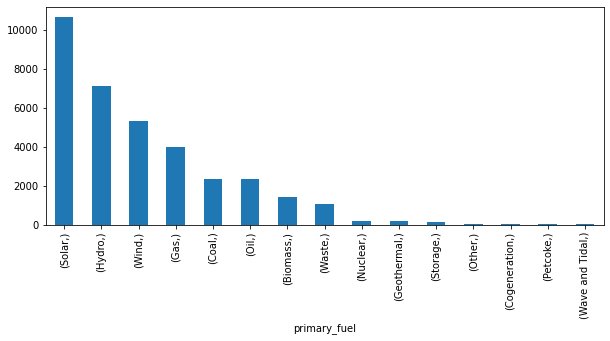

In [23]:
plt.figure(figsize=(10,4))
df_power_plants[['primary_fuel']].value_counts().plot.bar()

In [24]:
df_power_plants['primary_fuel'].unique()

array(['Hydro', 'Solar', 'Gas', 'Other', 'Oil', 'Wind', 'Nuclear', 'Coal',
       'Waste', 'Biomass', 'Wave and Tidal', 'Petcoke', 'Geothermal',
       'Storage', 'Cogeneration'], dtype=object)

In [33]:
mapping = {
            'Gas': 'Other', 
            'Oil': 'Other', 
            'Hydro': 'Other', 
            'Coal': 'Other', 
            'Biomass': 'Other', 
            'Waste': 'Other',
            'Cogeneration': 'Other', 
            'Geothermal': 'Other', 
            'Petcoke': 'Other', 
            'Nuclear': 'Other', 
            'Other': 'Other',
            'Storage': 'Other',
            'Solar': 'Solar',
            'Wind': 'Wind'
            }

In [34]:
# df_power_plants_with_generation_not_nan['solar_wind_or_not'] = 

# df_power_plants_with_generation_not_nan['solar_wind_or_not'] = df_power_plants_with_generation_not_nan['primary_fuel'] == ('Wind' or 'Solar') ? 'solar_wind' : 'not'

df_power_plants['primary_fuel_transformed'] = df_power_plants['primary_fuel'].map(mapping)

# df_power_plants_with_generation_not_nan['solar_wind_or_not'] = df_power_plants_with_generation_not_nan['prmary_fuel'].map(mapping)
# df_power_plants_with_generation_not_nan['solar_wind_or_not'] = np.where((df_power_plants_with_generation_not_nan[['primary_fuel']] == 'Wind') | (df_power_plants_with_generation_not_nan[['primary_fuel']] == 'Solar'), 'solar_wind','not')

In [35]:
df_power_plants[['primary_fuel', 'primary_fuel_transformed']].sample(20)

,primary_fuel,primary_fuel_transformed
3177,Hydro,Other
33446,Solar,Solar
17113,Hydro,Other
11030,Solar,Solar
16522,Solar,Solar
31417,Oil,Other
3384,Wind,Wind
7218,Solar,Solar
29954,Wind,Wind
34847,Solar,Solar


In [39]:
df_power_plants.drop(columns=['primary_fuel'], inplace=True)

<AxesSubplot:xlabel='primary_fuel_transformed'>

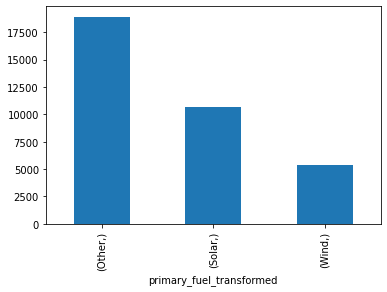

In [40]:
# df_power_plants_with_generation_not_nan.groupby(['solar_wind_or_not', 'primary_fuel'])['primary_fuel'].count().plot.bar()
df_power_plants[['primary_fuel_transformed']].value_counts().plot.bar()

In [41]:
df_power_plants.to_csv(dir_data_interim/"power_plants_with_generation_transformed.csv")